## IMPORTING NECCESARY LIBRARIES

In [5]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score

import json

## CREATING CLASSES

In [9]:
class Category:
    ELECTRONICS = "ELECTRONICS"
    BOOKS = "BOOKS"
    CLOTHING = "CLOTHING"
    FOOD = "FOOD"
    PATIO = "PATIO"

class Review:
    def __init__(self, category, text):
        self.category = category
        self.text = text
        
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_x(self, vectorizer):
        return vectorizer.transform(self.get_text())
    
    def get_category(self):
        return [x.category for x in self.reviews]

## LOAD IN THE DATA

In [10]:
file_names = ['./category/Electronics_small.json', './category/Books_small.json', './category/Clothing_small.json', './category/Grocery_small.json', './category/Patio_small.json']
file_categories = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.FOOD, Category.PATIO]

reviews = []
for i in range(len(file_names)):
    file_name = file_names[i]
    category = file_categories[i]
    with open(file_name) as f:
        for line in f:
            review_json = json.loads(line)
            review = Review(category, review_json['reviewText'])
            
            reviews.append(review)

## DATA PREP

In [11]:
train, test = train_test_split(reviews, test_size = 0.33, random_state=42)

train_container = ReviewContainer(train)
test_container = ReviewContainer(test)

corpus = train_container.get_text()

vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

train_x = train_container.get_x(vectorizer)
train_y = train_container.get_category()

test_x = test_container.get_x(vectorizer)
test_y = test_container.get_category()

## CLASSIFICATION

In [12]:
from sklearn import svm

clf = svm.SVC(C=1, kernel='rbf')
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.9193939393939394

In [13]:
test_set = ['the way it was put together was marvelous']
new_set = vectorizer.transform(test_set)

clf.predict(new_set)

array(['BOOKS'], dtype='<U11')

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(train_x.todense(),train_y)
gnb.score(test_x.todense(),test_y)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.8109090909090909

In [15]:
y_pred = clf.predict(test_x)
f1_score(test_y,y_pred,average = None)

array([0.95366218, 0.9009009 , 0.89142857, 0.93188854, 0.92084006])

In [16]:
y_pred = gnb.predict(test_x.todense())
f1_score(test_y,y_pred,average = None)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([0.84161491, 0.76725522, 0.7994012 , 0.85139319, 0.79554937])

## CONFUSION MATRIX

In [17]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## HEATMAP FOR SVM CLASSIFIER

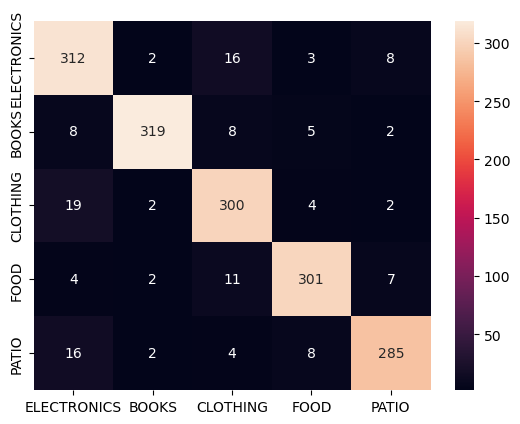

In [36]:
y_pred = clf.predict(test_x)

labels = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.FOOD, Category.PATIO]

cm = confusion_matrix(test_y,y_pred,labels = labels)
df_cm = pd.DataFrame(cm,index = labels,columns = labels)

sns.heatmap(df_cm, annot = True, fmt = 'd')

plt.savefig("svmHeatmap.png")

plt.show()

## HEATMAP FOR NAIVE BAYES CLASSIFIER

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


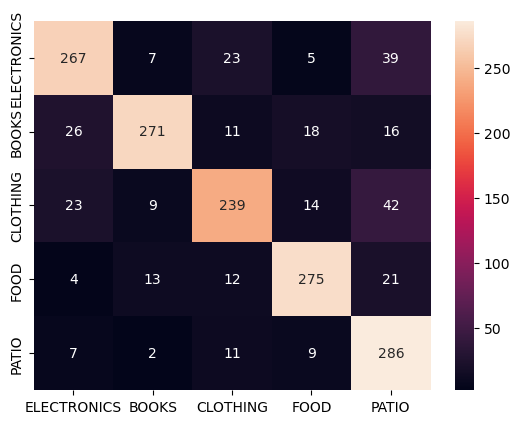

In [37]:
y_pred = gnb.predict(test_x.todense())

labels = [Category.ELECTRONICS, Category.BOOKS, Category.CLOTHING, Category.FOOD, Category.PATIO]

cm = confusion_matrix(test_y,y_pred,labels = labels)
df_cm = pd.DataFrame(cm,index = labels,columns = labels)

sns.heatmap(df_cm, annot = True, fmt = 'd')

plt.savefig("gnbHeatmap.png")

plt.show()

## SAVING THE MODEL

In [21]:
import pickle
with open("./models./CategoryClassifier.pkl",'wb') as f:
    pickle.dump(clf,f)

In [22]:
with open("./models./CategoryClassifier.pkl",'rb') as f:
    pickle.load(f)

In [41]:
test_set = ['good for gaming']
new_set = vectorizer.transform(test_set)

clf.predict(new_set)

array(['ELECTRONICS'], dtype='<U11')